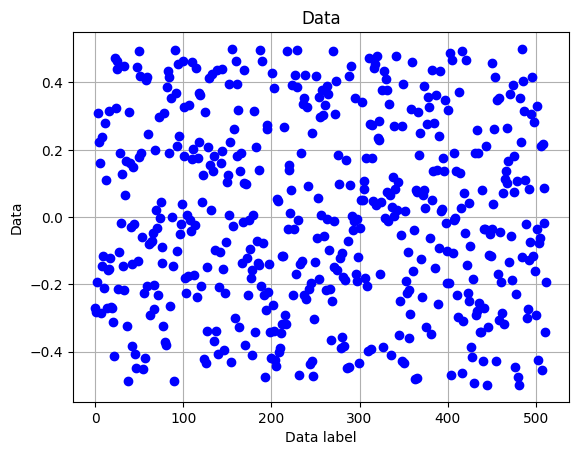

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
data = np.loadtxt("noise.txt",dtype = np.float64)
x = np.linspace(0.0,len(data),len(data),dtype=np.float64)
plt.plot(x,data,'ob')
plt.xlabel("Data label")
plt.ylabel("Data")
# plt.legend()
plt.title('Data')
plt.grid()


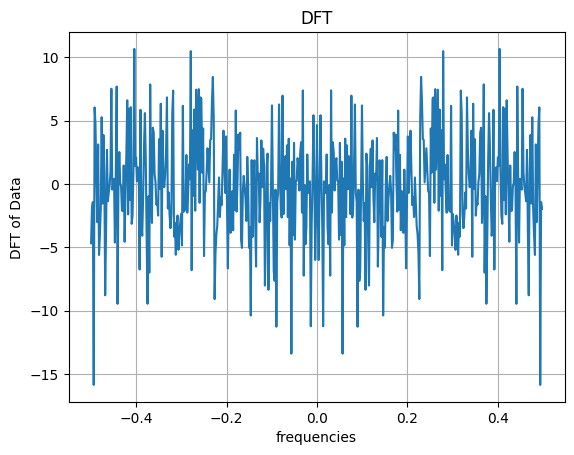

In [26]:
import numpy.fft as ft
k = np.fft.fftshift(np.fft.fftfreq(len(data)))
dft=ft.fft(data).real
dft_shifted = np.fft.fftshift(dft)
plt.plot(k,dft_shifted,label='DFT')
plt.xlabel("frequencies")
plt.ylabel("DFT of Data")
# plt.legend()
plt.title('DFT')
plt.grid()

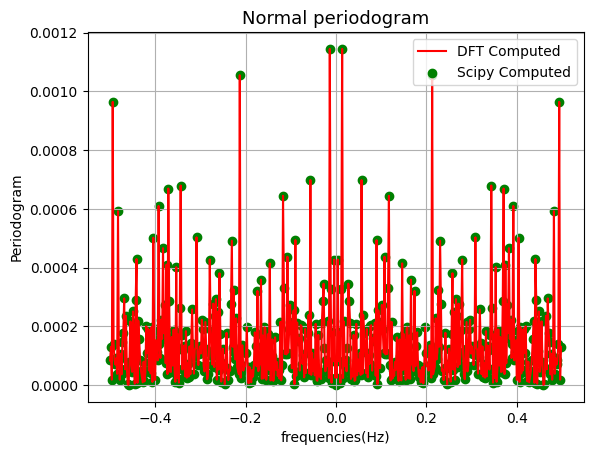

In [22]:
def calc_pow_spec(data,binned = False):
	if(binned == False ):
		k = np.fft.fftshift(np.fft.fftfreq(len(data)))
		dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
		spec = (1.0/len(data))*np.absolute(dft)**2.0
		return [k,spec]
	else:
		dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
		val = np.mean(np.absolute(dft)**2.0)
		return val
pow_spec = calc_pow_spec(data)
# performing Accuracy test using Scipy
sci_pow_spec = sps.periodogram(data,scaling = 'spectrum',return_onesided = False)

# Binned Power Spectrum

data_bin = np.zeros(shape = (52,10),dtype = np.float64)
binned_pow_spec = np.zeros(52,dtype = np.float64)

# We took the length as 52 since there are 512 data points
k = 0
for i in range(len(data_bin)):
	for j in range(10):
		data_bin[i][j] = data[k]
		k = k+1
		if(k == len(data)):
			break
for i in range(len(data_bin)):
	binned_pow_spec[i] = calc_pow_spec(data_bin[i],binned = True)


plt.title("Normal periodogram",size = 13)
plt.plot(pow_spec[0],pow_spec[1],color = 'red',label = 'DFT Computed')
plt.scatter(sci_pow_spec[0],sci_pow_spec[1],color = 'green',label = 'Scipy Computed')
plt.xlabel("frequencies(Hz)")
plt.ylabel("Periodogram")
plt.legend()
plt.grid()


plt.show()

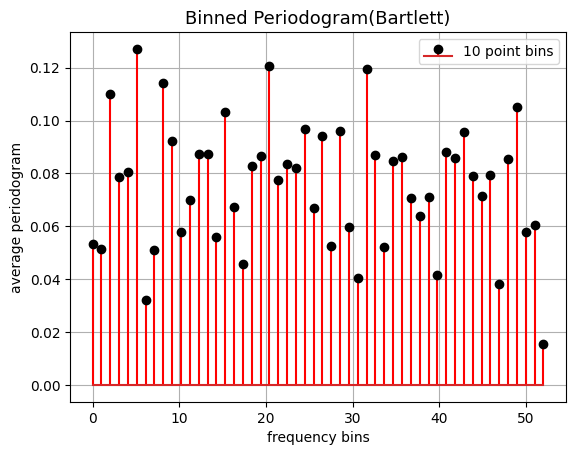

In [21]:
plt.title("Binned Periodogram(Bartlett)",size = 13)
plt.stem(np.linspace(0.0,len(binned_pow_spec),len(binned_pow_spec)),binned_pow_spec,markerfmt = ('o','black'),linefmt = ('-','red'),label = "10 point bins")
plt.xlabel("frequency bins")
plt.ylabel("average periodogram")
plt.legend()
plt.grid()
plt.show()
